# College Ranks from US News and World Report

## Section 1: Dataset
After attending college for a year, I wanted to explore more about colleges and their ranks. I wanted to do some surface level exploring by looking at the US News and World Report rankings.

This dataset is meaningful to me because I am in college and I loved looking at the rankings when I was applying and seeing what I was on par with. It is just good entertainment for me.

I found this dataset by searching for colleges ranked generally on Google and it had data from 1986-2024. I had to manipulate it a little bit becaseu some of the data for 2024 was wrong. This is the `collegesranked.csv` dataset.

Plan: US Map, Maybe US map with hover

In [344]:
import pandas as pd

In [345]:
df = pd.read_csv('collegesranked.csv')
df.head()

,Name,State,Conference,PrivatePublic,2024,2023,2022,2021,2020,2019,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,Princeton University,NJ,Ivy League,Private,1,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
1,Massachusetts Institute of Technology,MA,NEWMAC,Private,2,2.0,2.0,4.0,3.0,3.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,NaN,10.0
2,Harvard University,MA,Ivy League,Private,3,3.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
3,Stanford University,CA,ACC,Private,3,3.0,6.0,6.0,6.0,7.0,...,5.0,6.0,4.0,3.0,2.0,6.0,6.0,1.0,1.0,1.0
4,Yale University,CT,Ivy League,Private,5,3.0,5.0,4.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0


In [346]:
df_100 = df[['Name', 'State', 'Conference', 'PrivatePublic', '2024']]
df_100.head()

,Name,State,Conference,PrivatePublic,2024
0,Princeton University,NJ,Ivy League,Private,1
1,Massachusetts Institute of Technology,MA,NEWMAC,Private,2
2,Harvard University,MA,Ivy League,Private,3
3,Stanford University,CA,ACC,Private,3
4,Yale University,CT,Ivy League,Private,5


In [347]:
df_100 = df_100[df_100['2024'] <= 100]
df_100

,Name,State,Conference,PrivatePublic,2024
0,Princeton University,NJ,Ivy League,Private,1
1,Massachusetts Institute of Technology,MA,NEWMAC,Private,2
2,Harvard University,MA,Ivy League,Private,3
3,Stanford University,CA,ACC,Private,3
4,Yale University,CT,Ivy League,Private,5
...,...,...,...,...,...
99,Rochester Institute of Technology,NY,Liberty,Private,98
100,Rutgers University-Camden,NJ,NJAC,Public,98
101,Texas Christian University,TX,Big 12,Private,98
102,University of Oregon,OR,Big 10,Public,98


<hr style="color: #C68E74;">

## Section 2: Exploratory Data Analysis
We can do some exploratory data analysis by using some of the descriptive statistics. We can use **mean**, **median**, and **mode** to do some analysis.
 
Let's start with looking at the Mean for some of this data.

In [348]:
df_100_cut = df_100[['State', '2024']]
df_100_grouped = df_100_cut.groupby('State').agg('mean').reset_index()
df_100_grouped.nsmallest(10, '2024')

,State,2024
24,RI,9.000000
18,NH,18.000000
26,TN,18.000000
16,MO,24.000000
13,MD,27.500000
3,CT,31.500000
17,NC,34.000000
7,GA,34.666667
14,MI,40.500000
28,VA,41.333333


We see that Rhode Island has the highest average rank in the top 100 colleges.

However, this is an interesting result because this descriptive statistic means nothing at all. The results of this mean is skewed because there are different number of colleges per state. Say there is one good school in a state and all of the other schools in the state are below the top 100, then the result will show that state is very high.

Let's try something a little different. But keep in mind that this carries over for all of the analysis that we do because we don't have full details for all of the colleges.

In [349]:
df_100_cut_2 = df_100[['Conference', '2024']]
df_100_grouped_2 = df_100_cut_2.groupby('Conference').agg('mean').reset_index()
df_100_grouped_2.nsmallest(10, '2024')

,Conference,2024
23,SCIAC,7.000000
13,Ivy League,8.250000
12,Centennial,9.000000
25,UAA,34.875000
4,BWC,40.000000
18,NESCAC,40.000000
19,NEWMAC,42.000000
2,ACC,43.882353
24,SEC,44.166667
21,Patriot,45.000000


This statistic shows that the SCIAC conference has the highest average rank in the top 100 colleges in the US.

This same logic fails this analysis here too. We can also look at one more thing.

In [350]:
df_100_cut_3 = df_100[['PrivatePublic', '2024']]
df_100_grouped_3 = df_100_cut_3.groupby('PrivatePublic').agg('mean').reset_index()
df_100_grouped_3.nsmallest(10, '2024')

,PrivatePublic,2024
0,Private,46.00
1,Public,56.28


In [351]:
df_100_grouped_3 = df_100_cut_3.groupby('PrivatePublic').agg('count').reset_index()
df_100_grouped_3.nsmallest(10, '2024')

,PrivatePublic,2024
1,Public,50
0,Private,54


This is a pretty even split so we can see that Private colleges have a little higher rank compared to Public colleges in the US.

Let's look at the median for this data.

In [352]:
df_100_grouped = df_100_cut.groupby('State').agg('median').reset_index()
df_100_grouped.nsmallest(10, '2024')

,State,2024
24,RI,9.0
18,NH,18.0
26,TN,18.0
16,MO,24.0
13,MD,27.5
3,CT,31.5
7,GA,33.0
1,CA,34.0
17,NC,34.5
9,IL,35.0


This same logic for the mean applies to the median. So this is not an accurate way of testing anything.

In [353]:
df_100_grouped_2 = df_100_cut_2.groupby('Conference').agg('median').reset_index()
df_100_grouped_2.nsmallest(10, '2024')

,Conference,2024
23,SCIAC,7.0
13,Ivy League,7.5
12,Centennial,9.0
25,UAA,29.5
4,BWC,33.0
24,SEC,39.5
18,NESCAC,40.0
19,NEWMAC,42.0
5,Big 10,43.0
21,Patriot,45.0


This method for the conferences in the US yields the same result as mean for the conferences.

Let's test it on the Private and Public schools

In [354]:
df_100_grouped_3 = df_100_cut_3.groupby('PrivatePublic').agg('median').reset_index()
df_100_grouped_3.nsmallest(10, '2024')

,PrivatePublic,2024
0,Private,45.0
1,Public,55.5


This yielded similar results to the mean. But we can try and conclude that this is accurate because the sample size is almost the same.

Now we can do descriptive analysis on this data by using the mode.

In [355]:
df_100_grouped = df_100_cut.groupby('State').agg('count').reset_index()
df_100_grouped.nlargest(10, '2024')

,State,2024
1,CA,16
20,NY,11
12,MA,9
23,PA,8
19,NJ,6
27,TX,6
9,IL,5
6,FL,4
17,NC,4
7,GA,3


This method at looking at the data is more effective. Although this method is surface level, it shows us what states have the most amount of colleges in the top 100 colleges in the US. It shows that California produces a lot of good colleges and then New York and then Massachusetts.

In [356]:
df_100_grouped_2 = df_100_cut_2.groupby('Conference').agg('count').reset_index()
df_100_grouped_2.nlargest(10, '2024')

,Conference,2024
2,ACC,17
5,Big 10,17
13,Ivy League,8
25,UAA,8
24,SEC,6
4,BWC,5
26,WCC,5
1,AAC,4
7,Big East,4
10,CAA,4


This shows us what conferences have the most amount of schools in the Top 100. We can see that ACC and the Big 10 are in the top.

In [357]:
df_100_grouped_3 = df_100_cut_3.groupby('PrivatePublic').agg('count').reset_index()
df_100_grouped_3.nsmallest(10, '2024')

,PrivatePublic,2024
1,Public,50
0,Private,54


We already looked at this result, but here it is again.

The issue with the Mode method is that this doesn't mean that the colleges with the most amount of colleges in a category means that category is better than another. We would have to weight it with the mean. Then we would be able to see what category is better. But we can see the surface level part about this.

<hr style="color: #C68E74;">

## Section 3: Exploratory Data Visualization

Now we can make a couple of plots with the information that we gathered.

In [358]:
import plotly.express as px
import plotly.graph_objects as go

In [359]:
df_cut = df[['State', '2024']]
df_grouped = df_cut.groupby('State').agg('count').reset_index()
df_grouped.nlargest(10, '2024')
df_grouped.head()

,State,2024
0,AL,2
1,AZ,2
2,CA,22
3,CO,4
4,CT,3


In [360]:
fig = px.choropleth(df_grouped, 
                    locations='State', 
                    locationmode="USA-states", 
                    color='2024',
                    color_continuous_scale="Viridis",
                    range_color=(0, 22),
                    scope="usa",
                    hover_name = 'State',
                    title = 'Number of Colleges in the Top 150 Colleges',
                    labels={'2024':'Number of Colleges'}
                    )
fig.show()

<Axes: title={'center': 'Number of Colleges in the Top 150 Colleges per State'}, xlabel='State', ylabel='Amount of Colleges'>

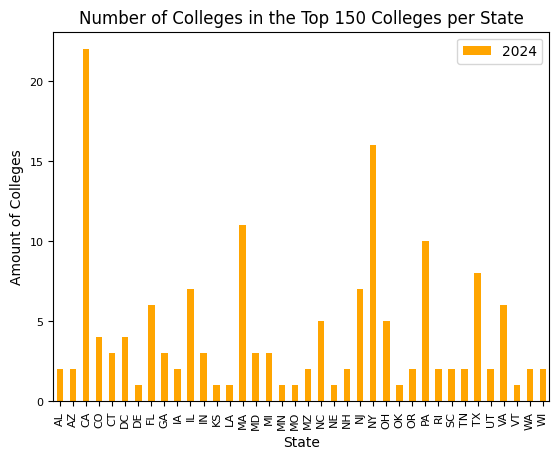

In [361]:
df_grouped.plot.bar(x = "State", y = "2024", color = "orange",  linewidth=3, title = "Number of Colleges in the Top 150 Colleges per State", xlabel = "State", ylabel = "Amount of Colleges", fontsize = 8)

In [362]:
df_cut_2_pri = df[['State', 'PrivatePublic']]
df_cut_2_pri = df_cut_2_pri[df_cut_2_pri["PrivatePublic"] == "Private"]
df_grouped_2_pri = df_cut_2_pri.groupby('State').agg('count').reset_index()
df_grouped_2_pri.nlargest(10, 'PrivatePublic')
df_grouped_2_pri.head()

,State,PrivatePublic
0,CA,10
1,CO,1
2,CT,2
3,DC,4
4,FL,1


In [363]:
fig_2 = px.choropleth(df_grouped_2_pri, 
                    locations='State', 
                    locationmode="USA-states", 
                    color='PrivatePublic',
                    color_continuous_scale="Viridis",
                    range_color=(0, 10),
                    scope="usa",
                    hover_name = 'State',
                    title = 'Number of Private Colleges in the Top 150 Colleges',
                    labels={'2024':'Number of Colleges'}
                    )
fig_2.show()

<Axes: title={'center': 'Number of Private Colleges in the Top 150 Colleges per State'}, xlabel='State', ylabel='Amount of Colleges'>

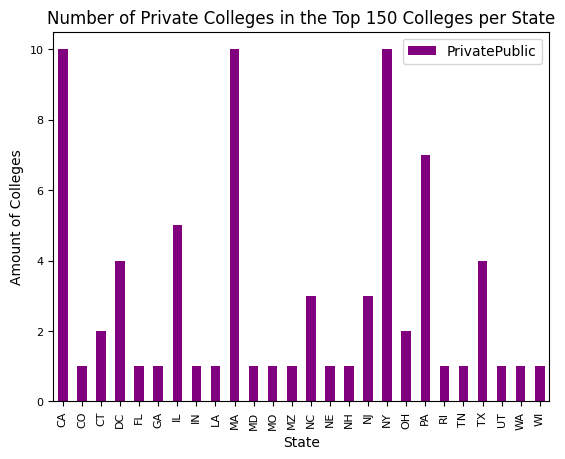

In [364]:
df_grouped_2_pri.plot.bar(x = "State", y = "PrivatePublic", color = "purple",  linewidth=3, title = "Number of Private Colleges in the Top 150 Colleges per State", xlabel = "State", ylabel = "Amount of Colleges", fontsize = 8)

In [365]:
df_cut_2_pub = df[['State', 'PrivatePublic']]
df_cut_2_pub = df_cut_2_pub[df_cut_2_pub["PrivatePublic"] == "Public"]
df_grouped_2_pub = df_cut_2_pub.groupby('State').agg('count').reset_index()
df_grouped_2_pub.nlargest(10, 'PrivatePublic')
df_grouped_2_pub.head()

,State,PrivatePublic
0,AL,2
1,AZ,2
2,CA,12
3,CO,3
4,CT,1


In [366]:
fig_3 = px.choropleth(df_grouped_2_pub, 
                    locations='State', 
                    locationmode="USA-states", 
                    color='PrivatePublic',
                    color_continuous_scale="Viridis",
                    range_color=(0, 12),
                    scope="usa",
                    hover_name = 'State',
                    title = 'Number of Public Colleges in the Top 150 Colleges',
                    labels={'2024':'Number of Colleges'}
                    )
fig_3.show()

<Axes: title={'center': 'Number of Public Colleges in the Top 150 Colleges per State'}, xlabel='State', ylabel='Amount of Colleges'>

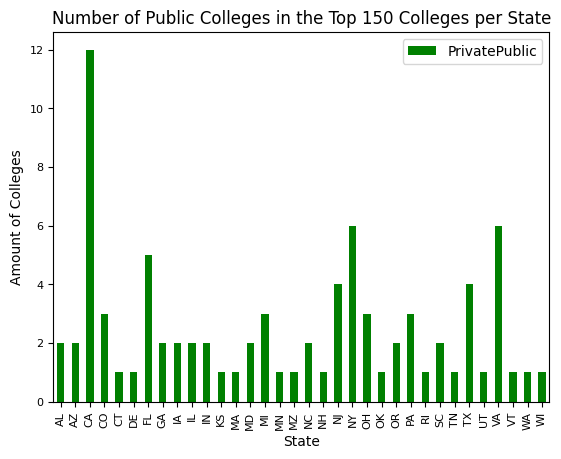

In [367]:
df_grouped_2_pub.plot.bar(x = "State", y = "PrivatePublic", color = "green",  linewidth=3, title = "Number of Public Colleges in the Top 150 Colleges per State", xlabel = "State", ylabel = "Amount of Colleges", fontsize = 8)

<hr style="color: #C68E74;">

## Conclusion

I did this entire thing for fun. I learned that California leads with private and public schools in the top 150 schools in the US. Some of the bigger states like Texas, Florida, and New York lead close by. I did this mostly just so I can see the different possibilities of maps that I can do in python. Thank you for looking at my work.